Para começar, vamos criar o banco de dados "vacinados", utilizando os dados da API do data-set escolhido.


In [46]:
import requests
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def create_vacinados_db():
    # URL da API
    url = f"http://dados.recife.pe.gov.br/api/3/action/datastore_search?&resource_id=ca7fb968-3a2c-44ff-a2e8-730d1a689407&limit=300000"

    # Fazer a requisição à API
    response = requests.get(url)
    data = response.json()

    if 'result' in data and 'records' in data['result']:
        vacinados = data['result']['records']
    else:
        print("Erro: Não foi possível obter os dados da API.")
        return


    # Criar ou conectar ao banco de dados SQLite
    conn = sqlite3.connect('vacinados.db')
    c = conn.cursor()

    # Criar a tabela, se não existir
    c.execute('''
    CREATE TABLE IF NOT EXISTS vacinados (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    faixa_etaria TEXT,
    idade NUMERIC,
    sexo TEXT,
    raca_cor TEXT,
    municipio TEXT,
    grupo TEXT,
    categoria TEXT,
    lote TEXT,
    vacina_fabricante TEXT,
    descricao_dose NUMERIC,
    cnes TEXT,
    sistema_origem TEXT,
    data_vacinacao TIMESTAMP
    );
    ''')



    # Inserir dados no banco de dados
    for vacina in vacinados:
        c.execute('''
        INSERT INTO vacinados (faixa_etaria, idade, sexo, raca_cor, municipio, grupo, categoria, lote, vacina_fabricante, descricao_dose, cnes, sistema_origem, data_vacinacao)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
        ''', (
            vacina.get('faixa_etaria', ''),
            vacina.get('idade', 0),
            vacina.get('sexo', ''),
            vacina.get('raca_cor', ''),
            vacina.get('municipio', ''),
            vacina.get('grupo', ''),
            vacina.get('categoria', ''),
            vacina.get('lote', ''),
            vacina.get('vacina_fabricante', ''),
            vacina.get('descricao_dose', 0),
            vacina.get('cnes', ''),
            vacina.get('sistema_origem', ''),
            vacina.get('data_vacinacao', '')
        ))

    # Commitar as mudanças e fechar a conexão
    conn.commit()
    conn.close()

# Exemplo de uso chamando a função para criar com todos os registros da API
create_vacinados_db()



Agora vamos criar uma nova conexão com o banco de dados para fazermos consultas:

In [10]:
connection = sqlite3.connect('vacinados.db')

# Criando uma variavel que recebe todo o valor da leitura
vc = pd.read_sql_query("select * from vacinados", connection)


Vamos começar nossa análise exploratória:

In [23]:
vc.info()
# um comando que vai dar as informações gerais da nossa base de dados, valores nulos e tipos de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 300000 non-null  int64  
 1   faixa_etaria       300000 non-null  object 
 2   idade              299999 non-null  float64
 3   sexo               300000 non-null  object 
 4   raca_cor           300000 non-null  object 
 5   municipio          300000 non-null  object 
 6   grupo              300000 non-null  object 
 7   categoria          300000 non-null  object 
 8   lote               300000 non-null  object 
 9   vacina_fabricante  300000 non-null  object 
 10  descricao_dose     300000 non-null  int64  
 11  cnes               300000 non-null  object 
 12  sistema_origem     300000 non-null  object 
 13  data_vacinacao     300000 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 32.0+ MB


,id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
299995,299996,55 a 59 anos,57.0,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FK8911,3 - COMIRNATY (PFIZER),3,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-01-13T00:00:00
299996,299997,45 a 49 anos,49.0,MASCULINO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2951,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-01-28T00:00:00
299997,299998,50 a 54 anos,54.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,205H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),2,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-01-12T00:00:00
299998,299999,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PESSOAS COM COMORBIDADES,OUTRAS,201H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2022-03-24T00:00:00
299999,300000,60 a 64 anos,63.0,FEMININO,PARDA,RECIFE,IDOSOS,,FK8911,3 - COMIRNATY (PFIZER),3,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-01-08T00:00:00


Agora outro comando que nos fornece um resumo estatistico do nosso banco:

Contagem (count): número de observações não nulas.

Média (mean): média aritmética dos valores.

Desvio padrão (std): medida de dispersão em torno da média.

Valor mínimo (min): menor valor na variável.

Quartis (25%, 50%, 75%): valores que dividem a distribuição em quartis, representando o primeiro quartil (Q1), mediana (Q2) e terceiro quartil (Q3).

Valor máximo (max): maior valor na variável.

In [19]:
vc.describe()

,id,idade,descricao_dose
count,300000.000000,299999.000000,300000.000000
mean,150000.500000,36.958233,2.643120
std,86602.684716,21.554643,1.028601
min,1.000000,-952.000000,1.000000
25%,75000.750000,16.000000,2.000000
50%,150000.500000,40.000000,3.000000
75%,225000.250000,55.000000,3.000000
max,300000.000000,118.000000,5.000000


Agora vamos utilizar o comando display para mostrar os 5 primeiros e os 5 últimos dados e também a quantidade de informações que temos:

In [31]:
display(vc)

,id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,1,40 a 44 anos,40.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,222VCD045W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-09-14T00:00:00
1,2,70 a 74 anos,73.0,FEMININO,BRANCA,RECIFE,IDOSOS,,FN9607,3 - COMIRNATY (PFIZER),4,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-06-12T00:00:00
2,3,30 a 34 anos,33.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2948,3 - COMIRNATY (PFIZER),3,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2022-03-30T00:00:00
3,4,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-07-19T00:00:00
4,5,35 a 39 anos,38.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,221VCDO32Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,ESUS,2022-08-18T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,55 a 59 anos,57.0,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FK8911,3 - COMIRNATY (PFIZER),3,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-01-13T00:00:00
299996,299997,45 a 49 anos,49.0,MASCULINO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,FM2951,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-01-28T00:00:00
299997,299998,50 a 54 anos,54.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),,205H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),2,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2022-01-12T00:00:00
299998,299999,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PESSOAS COM COMORBIDADES,OUTRAS,201H21A,4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2022-03-24T00:00:00


(300000, 14)

Agora para visualizar o periodo da analise:

In [32]:
inicio = pd.to_datetime(vc['data_vacinacao']).dt.date.min()
print("Data de inicio", inicio)
fim = pd.to_datetime(vc['data_vacinacao']).dt.date.max()
print("Data final", fim)

Data de inicio 2022-01-03
Data final 2022-12-31


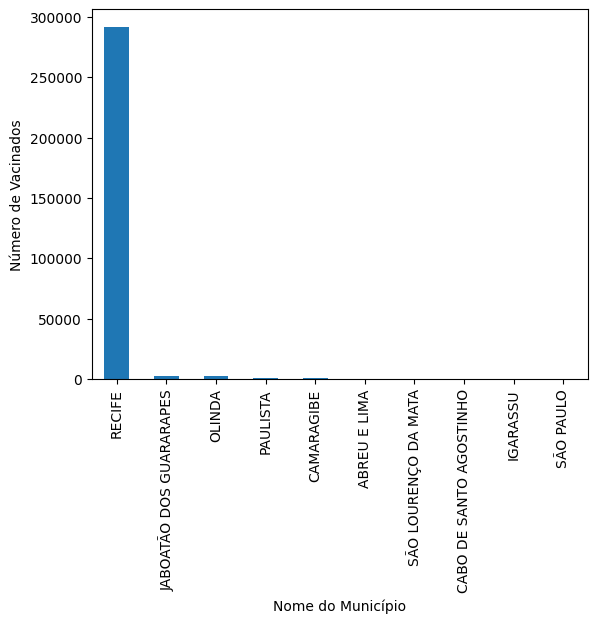

In [45]:
vc_municipio = vc.municipio.value_counts().head(10)
vc_municipio.plot(kind='bar')
plt.xlabel('Nome do Município')
plt.ylabel('Número de Vacinados')
plt.show()